# Bone Edge Detection in X-Rays using Convolutional Filters (Sobel L1 vs. L2)

**Biomedical Objective:** Identify abrupt discontinuities in pixel intensity (Hounsfield units or radiographic grayscale).
In a clinical context, these high gradients typically correspond to bone edges, foreign bodies, or fracture lines.

by RoshTzsche

In [1]:
import sys
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Add root directory to path to import the 'src' folder
sys.path.append(os.path.abspath('..')) 

from src.vision.filtro_sobel import apply_sobel_l2, apply_sobel_l1

In [2]:
# Chest X-ray loading 
image_path = "../images/xray_chest.jpg" # Adjust path as necessary

img = Image.open(image_path).convert('L') # Grayscale
img_tensor = torch.tensor(np.array(img), dtype=torch.float32) / 255.0

print(f"Original tensor dimensions: {img_tensor.shape}")

Original tensor dimensions: torch.Size([460, 474])


In [3]:
# Call our pure mathematical module
edge_tensorL2 = apply_sobel_l2(img_tensor)
edge_tensorL1 = apply_sobel_l1(img_tensor)
print(f"Feature map dimensions: {edge_tensorL1.shape}, {edge_tensorL2.shape}")

Feature map dimensions: torch.Size([1, 1, 460, 474]), torch.Size([1, 1, 460, 474])


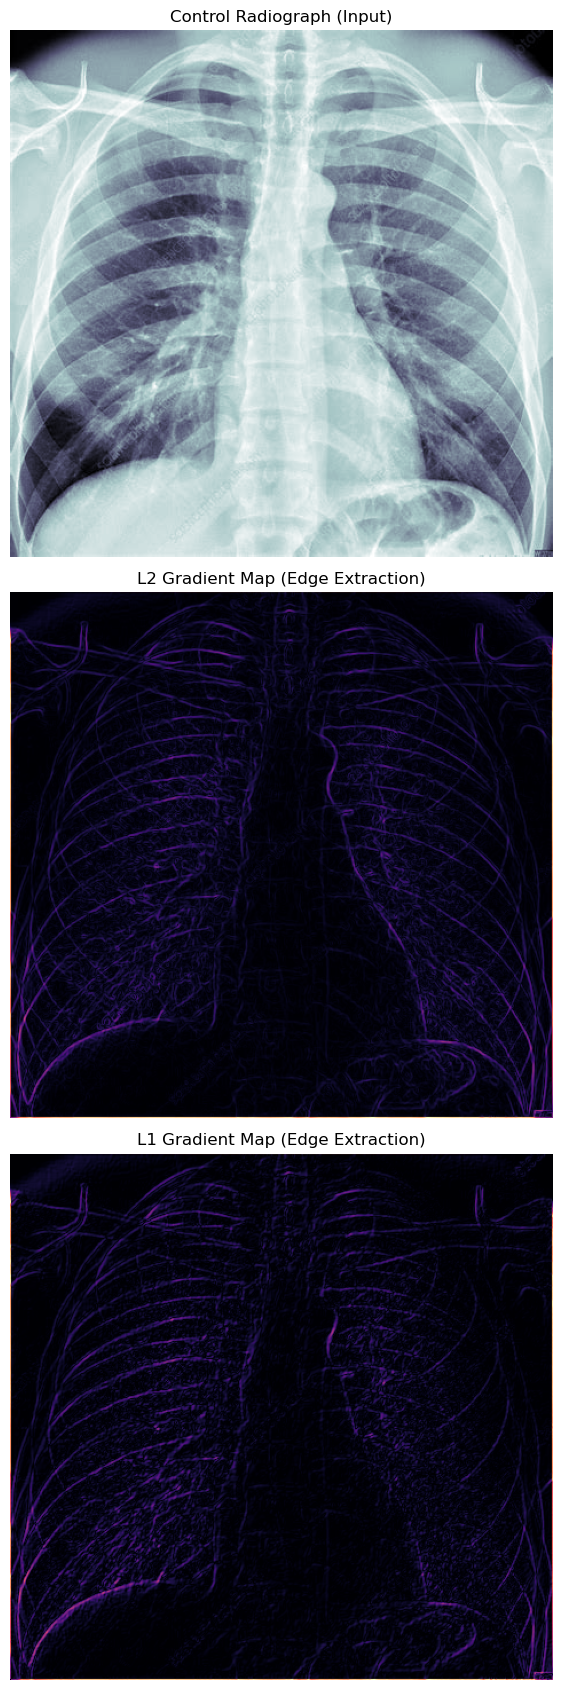

In [6]:
plt.figure(figsize=(18, 17))

plt.subplot(3, 1, 1)
plt.title("Control Radiograph (Input)")
plt.imshow(img_tensor, cmap='bone')
plt.axis('off')

plt.subplot(3, 1, 2)
plt.title("L2 Gradient Map (Edge Extraction)")
# Adjust dimensions for visualization
plt.imshow(edge_tensorL2.squeeze().numpy(), cmap='magma')
plt.axis('off')



plt.subplot(3, 1, 3)
plt.title("L1 Gradient Map (Edge Extraction)")
plt.imshow(edge_tensorL1.squeeze().numpy(), cmap='magma')

plt.axis('off')

plt.tight_layout()
plt.show()



**Results Analysis:**
1. **Structural Isolation:** The filter accentuates high-density structures (such as ribs and clavicles) by capturing the contrast differential against radiolucent lung tissue.
2. **Clinical Limitations:** The Sobel filter is highly sensitive to high-frequency noise (X-ray scatter artifacts). In future steps, applying a Gaussian Blur prior to the convolution is required to mitigate false positives in soft tissue.
3. **Differences:** At first glance there no such difference, but the manhattan (L1) norm, appears to be more noisier and sharper.